# Costa Rica Institute of Technology
* Course: MP-6122 Pattern Recognition
* Student: Jose Martinez Hdez
* Year: 2022
* Laboratory 3: CNN and ANN - MNIST Classification in Keras using a Jetson Nano

# Introduction

According to the [NVIDIA Jetson documentation](https://developer.nvidia.com/embedded/jetson-nano-developer-kit). NVIDIA® Jetson Nano™ Developer Kit is a small, powerful computer that lets you run multiple neural networks in parallel for applications like image classification, object detection, segmentation, and speech processing. All in an easy-to-use platform that runs in as little as 5 watts. The Jetson Nano could be seen in the following image:

![jetson](https://drive.google.com/uc?id=12J9vuJEO6vF4UJJVMt2Os0fDUtnb7rFb)

This board has the following I/O ports: 

1. microSD card slot for main storage
2. 40-pin expansion header
3. Micro-USB port for 5V power input, or for Device Mode
4. Gigabit Ethernet port
5. USB 3.0 ports (x4)
6. HDMI output port
7. DisplayPort connector
8. DC Barrel jack for 5V power input
9. MIPI CSI-2 camera connectors

And the technical specifications are:

![tech](https://drive.google.com/uc?id=13SMMkuE5Jh0UkOv1TGAbCL97h40hsIN7)

**References**: 

- https://developer.nvidia.com/embedded/jetson-nano-developer-kit
- https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit
- https://pyimagesearch.com/2019/05/06/getting-started-with-the-nvidia-jetson-nano/

# Getting started with the NVIDIA Jetson Nano

## Prepare for Setup
Before you can even boot up your NVIDIA Jetson Nano you need three things:

1. A micro-SD card (minimum 16GB), but it is recommended to use a micro-SD card of 32GB or more.	
2. A 5V 2.5A MicroUSB power supply
3. An ethernet cable or Wi-Fi usb adapter (Yes, it doesn't have Wi-Fi embedded on it 😭) 

To go deeper into the details of the Jetson Nano you can read the following article:

- https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#prepare

## Write Image to the microSD Card

To prepare your microSD card, you’ll need a computer with Internet connection and the ability to read and write SD cards, either via a built-in SD card slot or adapter.

1. Download the [Jetson Nano Developer Kit SD Card Image](https://developer.nvidia.com/jetson-nano-sd-card-image), and note where it was saved on the computer.
2. Write the image to your microSD card by following the instructions below according to your computer’s operating system: Windows, macOS, or Linux.

    - [Instructions for Windows](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#collapse-write_windows)
    - [Instructions for MacOS](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#collapse-write_macos)
    - [Instructions for Linux](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#collapse-write_linux)

## Setup and First Boot

There are two ways to interact with the developer kit: 

1. With display, keyboard and mouse attached 
2. In “headless mode” via connection from another computer.

You can conduct the initial setup either way. 

### Initial Setup with Display Attached

1. Insert the microSD card (with system image already written to it) into the slot on the underside of the Jetson Nano module.

![sd](https://drive.google.com/uc?id=13YjsTnZE2IVrQpAW45zDpcw4ptfrXnor)

2. Set the developer kit on top of the paper stand.
3. Power on your computer display and connect it.
4. Connect the USB keyboard and mouse.
4. Connect your Micro-USB power supply (or see the [Jetson Nano Developer Kit User Guide](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#) for details about using DC a power supply with a barrel jack connector). The developer kit will power on and boot automatically.

In the first boot, a green LED next to the Micro-USB connector will light as soon as the developer kit powers on. When you boot the first time, the developer kit will take you through some initial setup, including:

- Review and accept NVIDIA Jetson software EULA
- Select system language, keyboard layout, and time zone
- Create username, password, and computer name
- Select APP partition size—it is recommended to use the max size suggested

After logging in, you will see this screen. Congratulations!

![screen](https://drive.google.com/uc?id=13YoDJgyMZM2u5BmyvZUAxrYtuvbyiGy2)

**References**: 

- https://developer.nvidia.com/embedded/jetson-nano-developer-kit
- https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit
- https://pyimagesearch.com/2019/05/06/getting-started-with-the-nvidia-jetson-nano/

# Running the first code in the Jetson Nano

To get started, I really recomended to go over these link provided by NVIDIA:


- https://developer.nvidia.com/embedded/community/jetson-projects
- https://developer.nvidia.com/embedded/learn/jetson-ai-certification-programs#course_outline
- https://github.com/dusty-nv/jetson-inference



# Example of MNIST model running in the Jetson Nano

**Note**: The base code was taken from the following link:

- https://github.com/tflearn/tflearn/blob/master/examples/images/convnet_mnist.py
- https://github.com/fmezacr/patrones/tree/master/TfLearn_MNIST_ANN

## Install dependencies

In [2]:
!pip install keras
!pip install scipy
!pip install numpy
!pip install tensorflow
!pip install opencv-python
!pip install tflearn

## Import packages

In [3]:
# Import Numpy, TensorFlow, TFLearn, and MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

2022-04-30 23:57:14.651599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-30 23:57:14.651651: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


## Preprocessing

In [4]:
# Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


## EDA

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


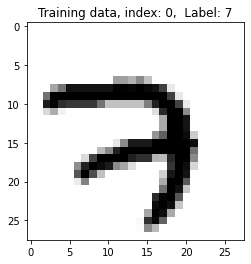

In [5]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
print(trainY[0])
show_digit(0)

## Building the network

In [6]:
from tensorflow.python.framework import ops

# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    ops.reset_default_graph()
    
    # Include the input layer, hidden layer(s), and set how you want to train the model
    #Inputs
    net = tflearn.input_data([None, 784])
    
    #Hidden layers
    net = tflearn.fully_connected(net, 100, activation = 'ReLU')
    
    #Output
    net = tflearn.fully_connected(net, 10, activation = 'softmax')
    
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.1, loss='categorical_crossentropy')
    
    # This model assumes that your network is named "net"    
    model = tflearn.DNN(net)
    return model

# Build the model
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2022-04-30 23:57:27.041130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-30 23:57:27.041205: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-30 23:57:27.041286: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jose13): /proc/driver/nvidia/version does not exist
2022-04-30 23:57:27.041972: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the network

In [7]:
# Training
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=20)

Training Step: 9899  | total loss: 0.05557 | time: 2.569s
| SGD | epoch: 020 | loss: 0.05557 - acc: 0.9901 -- iter: 49400/49500


Training Step: 9900  | total loss: 0.05394 | time: 3.601s
| SGD | epoch: 020 | loss: 0.05394 - acc: 0.9901 | val_loss: 0.08683 - val_acc: 0.9755 -- iter: 49500/49500
--


## Testing the network

In [8]:
# Compare the labels that our model predicts with the actual labels

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9741


In [10]:
# Save the entire model as a SavedModel.
!mkdir -p mnist/saved_model
model.save('mnist/saved_model/my_model')


INFO:tensorflow:/home/jose13/Documents/mp6122/mp6122_patterns/mnist/saved_model/my_model is not in all_model_checkpoint_paths. Manually adding it.


In [22]:
# Reload a fresh Keras model from the saved model:
new_model = build_model()
new_model.load('mnist/saved_model/my_model')

# Compare the labels that our model predicts with the actual labels

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(new_model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

INFO:tensorflow:Restoring parameters from /home/jose13/Documents/mp6122/mp6122_patterns/mnist/saved_model/my_model
Test accuracy:  0.9741


# Using the camera on the Jetson Nano

Run the following command to start the camera:

``` bash 
    $ python3 mnist/number_detector.py
```